In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


C:\Users\Nalegaonkarram\anaconda3\Anoconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Loading the data files

In [2]:
data=pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [8]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [9]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


### About The Dataset

#### The data has been split into two groups:

#### training set (train.csv)
#### test set (test.csv)
#### The training set includes passengers' survival status, which is used along with other features like gender, class, fare, and pclass to create the machine learning model.

#### The test set should be used to see how well the model performs on unseen data. We are going to use our model to predict passenger survival status.

In [10]:
import pandas as pd

# Define the data
data = {
    'Column Name': ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
    'Description': ['Passenger Identity', 'Whether passenger survived or not', 'Class of ticket, a proxy for socio-economic status (SES)', 'Name of passenger', 'Sex of passenger', 'Age of passenger in years', 'Number of sibling and/or spouse traveling with passenger', 'Number of parent and/or children traveling with passenger', 'Ticket number', 'Price of ticket', 'Cabin number', 'Port of embarkation'],
    'Key': ['Primary Key', 'Target Variable', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature', 'Feature']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define custom formatting for the DataFrame
formatted_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

# Display the formatted DataFrame

formatted_df

,Column Name,Description,Key
0,PassengerId,Passenger Identity,Primary Key
1,Survived,Whether passenger survived or not,Target Variable
2,Pclass,"Class of ticket, a proxy for socio-economic status (SES)",Feature
3,Name,Name of passenger,Feature
4,Sex,Sex of passenger,Feature
5,Age,Age of passenger in years,Feature
6,SibSp,Number of sibling and/or spouse traveling with passenger,Feature
7,Parch,Number of parent and/or children traveling with passenger,Feature
8,Ticket,Ticket number,Feature
9,Fare,Price of ticket,Feature


# Data understanding using EDA

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [12]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


# Exploring missing data


In [13]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [14]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

# #Dealing with the outlier

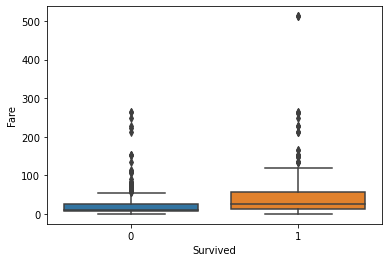

In [15]:
import seaborn as sns
sns.boxplot(x='Survived',y='Fare',data=train_df);

Passengers who paid over 250

In [16]:
train_df[train_df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1


In [17]:
train_df[train_df['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1


Captain Captain Edward Gifford Crosby decision to remain on board the Titanic in an attempt to save lives, even at great personal risk, exemplifies the dedication and sense of responsibility that many sea captains have shown throughout history.

His actions serve as a powerful reminder of the leadership and heroism often associated with those who navigate and command vessels at sea, especially during times of crisis.


### Embarked, Pclass and Sex:

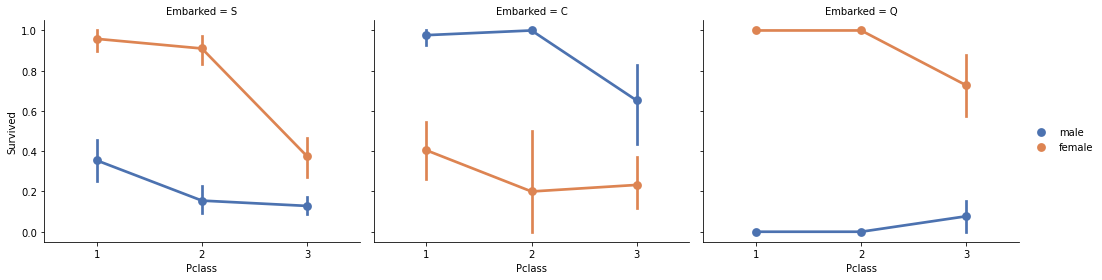

In [18]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

### Distribution of Pclass and Survived

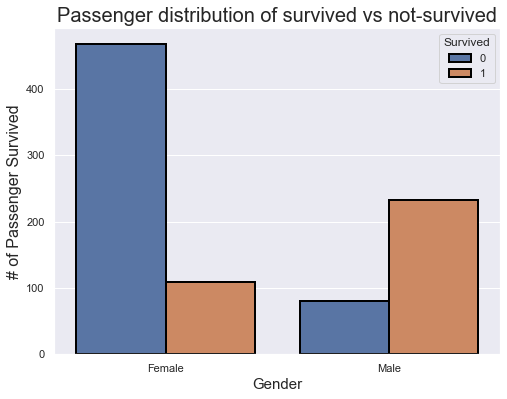

In [19]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=20)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 16)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [20]:
train_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.0


here we can see upto 74% of the women survived, while only 18% of men survived.

## Age and Sex distributions

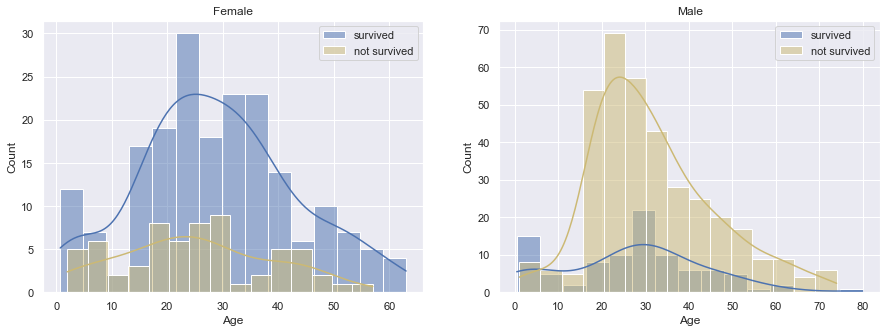

In [21]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=15, label = not_survived, ax = axes[0],color='y', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=15, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=15, label = not_survived, ax = axes[1],color='y', kde=True)
ax.legend()
ax.set_title('Male');

We can see that men have a higher probability of survival when they are between 18 and 35 years old. For women, the survival chances are higher between 15 and 40 years old.

For men, the probability of survival is very low between the ages of 5 and 18, and after 35, but that isn't true for women. Another thing to note is that infants have a higher probability of survival

### Looking differences between females and males statistics

In [22]:
train_df.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  train_test  
Sex    Pclass                          
female 1       106.125798         1.0  
       2        21.970121         1.0  
       3        16.118810         1.0  
male   1        67.226127         1.0  
       2        19.741782         1.0  
       3        12.661633         1.0

here we can see Women are much more likely to survive than men, specially women in the first and second class. It also shows that men in the first class are almost 3-times more likely to survive than men in the third class.

## Passenger class distribution; Survived vs Non-Survived

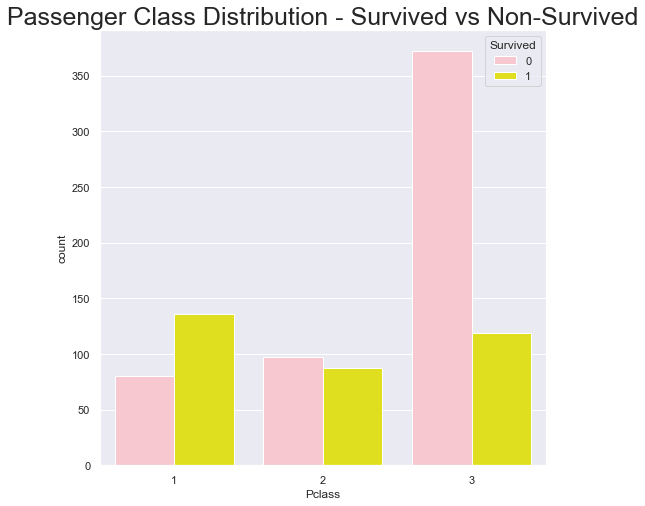

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(8, 8))
colors = ["pink", "yellow"]
ax = sns.countplot(x='Pclass', hue='Survived', data=train_df, palette=colors)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=25)
plt.show()


### Saving children first

In [24]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  train_test  
Sex    Pclass                          
female 1       104.083337         1.0  
       2        26.241667         1.0  
       3        18.727977         1.0  
male   1       116.072900         1.0  
       2        25.659473         1.0  
       3        22.752523         1.0

## Correlation Matrix and Heatmap

In [25]:
# Look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


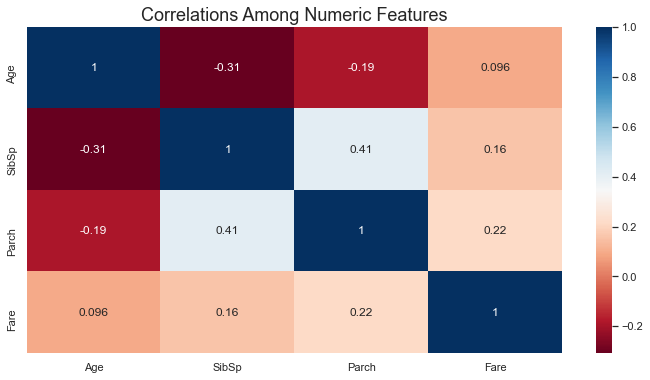

In [26]:
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

## Data Processing

### Drop 'PassengerId'

In [27]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Combining SibSp and Parch

In [28]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

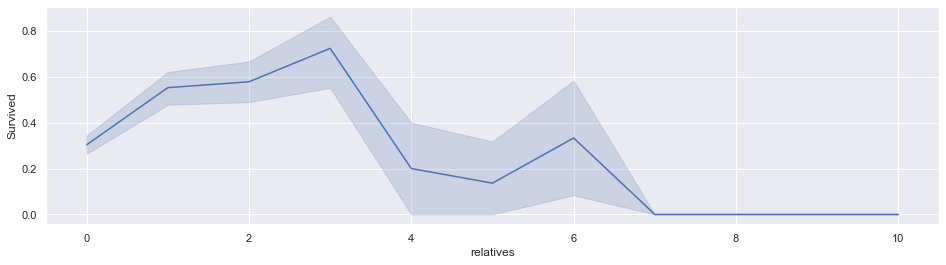

In [29]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

## Sex

Convert feature 'Sex' into numeric values

male = 0
female = 1

In [30]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [31]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,1
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,1,0,1
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,1,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,1,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,1,1,0


## Ticket

In [32]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

### Convert 'Embarked' feature into numeric values

In [33]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [34]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,1,0,1


### Fare

In [35]:
pd.qcut(train_df['Fare'], q=5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [36]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [37]:
# Checking the distribution
train_df['Age'].value_counts()

24    36
28    35
22    34
32    32
21    32
      ..
53     1
12     1
66     1
74     1
80     1
Name: Age, Length: 71, dtype: int64

In [38]:
train_df["Age"].isnull().sum()

0

### Model building

In [39]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [40]:
# Checking the dataset
train_df.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0.0,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1.0,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0.0,1,1,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0.0,1,0,1
5,0,3,"Moran, Mr. James",0,15,0,0,330877,8.4583,NaN,2.0,1,0,1
6,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,0.0,1,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,0.0,1,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,NaN,0.0,1,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,NaN,1.0,1,1,0


In [41]:
train_df['Embarked'].describe()

count    889.000000
mean       0.362205
std        0.636157
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [42]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [43]:
train_df['Embarked'].isnull().sum()

0

In [44]:
# Checking results
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0.0,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1.0,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0.0,1,1,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0.0,1,0,1


### Name
##### Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called 'Title' out of it.


In [45]:

data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [46]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,relatives,not_alone,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,0.0,1,1,0,1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,1.0,1,1,0,3
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0,1,2
3,1,1,1,35,1,0,113803,53.1000,C123,0.0,1,1,0,3
4,0,3,0,35,0,0,373450,8.0500,NaN,0.0,1,0,1,1


In [47]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [48]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [49]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test,relatives,not_alone,Title
0,0,3,0,22,1,0,7.2500,NaN,0.0,1,1,0,1
1,1,1,1,38,1,0,71.2833,C85,1.0,1,1,0,3
2,1,3,1,26,0,0,7.9250,NaN,0.0,1,0,1,2
3,1,1,1,35,1,0,53.1000,C123,0.0,1,1,0,3
4,0,3,0,35,0,0,8.0500,NaN,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,NaN,0.0,1,0,1,5
887,1,1,1,19,0,0,30.0000,B42,0.0,1,0,1,2
888,0,3,1,29,1,2,23.4500,NaN,0.0,1,3,0,2
889,1,1,0,26,0,0,30.0000,C148,1.0,1,0,1,1


In [50]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [51]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [52]:
train_df.head(857)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Title
0,0,3,0,22,1,0,7.2500,0.0,1,1,0,1
1,1,1,1,38,1,0,71.2833,1.0,1,1,0,3
2,1,3,1,26,0,0,7.9250,0.0,1,0,1,2
3,1,1,1,35,1,0,53.1000,0.0,1,1,0,3
4,0,3,0,35,0,0,8.0500,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
852,0,3,1,9,1,1,15.2458,1.0,1,2,0,2
853,1,1,1,16,0,1,39.4000,0.0,1,1,0,2
854,0,2,1,44,1,0,26.0000,0.0,1,1,0,3
855,1,3,1,18,0,1,9.3500,0.0,1,1,0,3


In [53]:
train_df['Embarked'].describe()

count     891.0
unique      4.0
top         0.0
freq      644.0
Name: Embarked, dtype: float64

In [54]:
train_df = train_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int32  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   train_test  891 non-null    int64  
 8   relatives   891 non-null    int64  
 9   not_alone   891 non-null    int32  
 10  Title       891 non-null    int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 69.7 KB


In [56]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
train_test    0
relatives     0
not_alone     0
Title         0
dtype: int64

In [57]:
x=train_df
y=train_df['Survived']

In [58]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train_test,relatives,not_alone,Title
0,0,3,0,22,1,0,7.2500,1,1,0,1
1,1,1,1,38,1,0,71.2833,1,1,0,3
2,1,3,1,26,0,0,7.9250,1,0,1,2
3,1,1,1,35,1,0,53.1000,1,1,0,3
4,0,3,0,35,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,1,0,1,5
887,1,1,1,19,0,0,30.0000,1,0,1,2
888,0,3,1,29,1,2,23.4500,1,3,0,2
889,1,1,0,26,0,0,30.0000,1,0,1,1


In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [98]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [99]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy on the training data is:",training_data_accuracy)


Accuracy on the training data is: 1.0


In [100]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print("Accuracy on the testing data is:",test_data_accuracy)

Accuracy on the testing data is: 1.0


In [101]:
input_data= (1,0,46,0,1,7.28,1,0,1,0,0)
#change the input array into numpy array
input_as_numpy =np.asarray(input_data)

In [102]:
input_reshaped =input_as_numpy.reshape(1,-1)
prediction =model.predict(input_reshaped)

In [103]:
print(prediction)
if (prediction[0]==1):
    print("THE PERSON WON'T BE SAVED FROM SINKING.")
else:
    print("THE PERSON WILL BE SAVED FROM SINKING.")
  

[1]
THE PERSON WON'T BE SAVED FROM SINKING.


In [104]:
train_df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64